In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pprint
tf.set_random_seed(777)

pp = pprint.PrettyPrinter(indent=4)

In [17]:
def MinMaxScaler(data):
    ''' Min Max Normalization
    Parameters
    ----------
    data : numpy.ndarray
        input data to be normalized
        shape: [Batch size, dimension]
    Returns
    ----------
    data : numpy.ndarry
        normalized data
        shape: [Batch size, dimension]
    References
    ----------
    .. [1] http://sebastianraschka.com/Articles/2014_about_feature_scaling.html
    '''
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [18]:
# training Parameters
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

In [19]:
# Open, High, Low, Volume, Close
xy = np.loadtxt('../data/data-02-stock_daily.csv', delimiter=',')
print(xy.shape)
xy = xy[::-1]  # reverse order (chronically ordered)
print(xy.shape)
pp.pprint(xy[0:5, 0:2])
xy = MinMaxScaler(xy)
pp.pprint(xy[0:5, 0:2])
print(xy.shape)
x = xy
y = xy[:, [-1]]  # Close as label

(732, 5)
(732, 5)
array([[ 568.00257 ,  568.00257 ],
       [ 561.202549,  566.43259 ],
       [ 566.892592,  567.002574],
       [ 558.712504,  568.452595],
       [ 599.992707,  604.832763]])
array([[ 0.21375105,  0.20817981],
       [ 0.19393503,  0.20364193],
       [ 0.21051645,  0.20528941],
       [ 0.18667876,  0.20948057],
       [ 0.30697388,  0.31463414]])
(732, 5)


In [23]:
# build a dataset
dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i + seq_length]
    _y = y[i + seq_length]  # Next close price
    pp.pprint(_x)
    print('->')
    pp.pprint(_y)
    dataX.append(_x)
    dataY.append(_y)

print(len(dataX))
print(len(dataY))

array([[  2.13751054e-01,   2.08179810e-01,   1.91791832e-01,
          4.66075110e-04,   1.92092403e-01],
       [  1.93935034e-01,   2.03641926e-01,   2.08664571e-01,
          2.98467330e-03,   1.96551555e-01],
       [  2.10516454e-01,   2.05289413e-01,   2.03558748e-01,
          2.59926504e-04,   1.87749731e-01],
       [  1.86678765e-01,   2.09480567e-01,   2.08781843e-01,
          0.00000000e+00,   2.17448151e-01],
       [  3.06973882e-01,   3.14634137e-01,   2.18993665e-01,
          1.24764722e-02,   2.16981885e-01],
       [  2.19142110e-01,   2.63907214e-01,   2.24686396e-01,
          4.56323384e-01,   2.24967473e-01],
       [  2.33129931e-01,   2.36419163e-01,   1.62682724e-01,
          5.70171193e-01,   1.47442742e-01]])
->
array([ 0.13289962])
array([[  1.93935034e-01,   2.03641926e-01,   2.08664571e-01,
          2.98467330e-03,   1.96551555e-01],
       [  2.10516454e-01,   2.05289413e-01,   2.03558748e-01,
          2.59926504e-04,   1.87749731e-01],
       [  1.

array([ 0.09941237])
array([[ 0.09905103,  0.11924158,  0.11722888,  0.21129336,  0.12316526],
       [ 0.11405885,  0.10952968,  0.11353161,  0.18323922,  0.10022843],
       [ 0.10321823,  0.10311292,  0.10141251,  0.16807385,  0.09504062],
       [ 0.08118761,  0.08302449,  0.08175214,  0.18754145,  0.06886882],
       [ 0.06565526,  0.06539287,  0.04472012,  0.29825222,  0.07169585],
       [ 0.06483929,  0.09678302,  0.08439305,  0.24120283,  0.10244347],
       [ 0.09602047,  0.09256286,  0.10258633,  0.15624272,  0.09941237]])
->
array([ 0.11308129])
array([[ 0.11405885,  0.10952968,  0.11353161,  0.18323922,  0.10022843],
       [ 0.10321823,  0.10311292,  0.10141251,  0.16807385,  0.09504062],
       [ 0.08118761,  0.08302449,  0.08175214,  0.18754145,  0.06886882],
       [ 0.06565526,  0.06539287,  0.04472012,  0.29825222,  0.07169585],
       [ 0.06483929,  0.09678302,  0.08439305,  0.24120283,  0.10244347],
       [ 0.09602047,  0.09256286,  0.10258633,  0.15624272,  0.099

array([ 0.129373])
array([[ 0.10805568,  0.10701502,  0.09093687,  0.25471901,  0.10471665],
       [ 0.097186  ,  0.10817125,  0.10475778,  0.18201129,  0.10693169],
       [ 0.10079959,  0.106067  ,  0.09891833,  0.14840011,  0.0880459 ],
       [ 0.08491767,  0.09400814,  0.10132451,  0.16508022,  0.10209368],
       [ 0.09613693,  0.11915472,  0.11400106,  0.15735413,  0.11206117],
       [ 0.097186  ,  0.10412462,  0.1128567 ,  0.11291566,  0.10282233],
       [ 0.10097438,  0.12060001,  0.11549761,  0.1561262 ,  0.129373  ]])
->
array([ 0.12654596])
array([[ 0.097186  ,  0.10817125,  0.10475778,  0.18201129,  0.10693169],
       [ 0.10079959,  0.106067  ,  0.09891833,  0.14840011,  0.0880459 ],
       [ 0.08491767,  0.09400814,  0.10132451,  0.16508022,  0.10209368],
       [ 0.09613693,  0.11915472,  0.11400106,  0.15735413,  0.11206117],
       [ 0.097186  ,  0.10412462,  0.1128567 ,  0.11291566,  0.10282233],
       [ 0.10097438,  0.12060001,  0.11549761,  0.1561262 ,  0.12937

In [26]:
# train/test split
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataY)])

In [27]:
# input place holders
X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])

In [28]:
# build a LSTM network
cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
Y_pred = tf.contrib.layers.fully_connected(outputs[:, -1], output_dim, activation_fn=None)  # We use the last cell's output

In [29]:
# cost/loss
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [30]:
# RMSE
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

[step: 0] loss: 20.307445526123047
[step: 1] loss: 4.098392009735107
[step: 2] loss: 3.0332963466644287
[step: 3] loss: 8.53342056274414
[step: 4] loss: 6.290993690490723
[step: 5] loss: 2.569483757019043
[step: 6] loss: 1.3832398653030396
[step: 7] loss: 2.3265435695648193
[step: 8] loss: 3.611100196838379
[step: 9] loss: 4.073938369750977
[step: 10] loss: 3.5332326889038086
[step: 11] loss: 2.4297866821289062
[step: 12] loss: 1.417636752128601
[step: 13] loss: 1.0200070142745972
[step: 14] loss: 1.336848258972168
[step: 15] loss: 1.9481889009475708
[step: 16] loss: 2.2443277835845947
[step: 17] loss: 1.977163553237915
[step: 18] loss: 1.4114124774932861
[step: 19] loss: 0.9805566072463989
[step: 20] loss: 0.9135813117027283
[step: 21] loss: 1.1367957592010498
[step: 22] loss: 1.4113807678222656
[step: 23] loss: 1.5277886390686035
[step: 24] loss: 1.421948790550232
[step: 25] loss: 1.1795673370361328
[step: 26] loss: 0.9599193334579468
[step: 27] loss: 0.8890533447265625
[step: 28] lo

[step: 237] loss: 0.5622085928916931
[step: 238] loss: 0.5611929893493652
[step: 239] loss: 0.5601821541786194
[step: 240] loss: 0.5591756105422974
[step: 241] loss: 0.5581738352775574
[step: 242] loss: 0.5571764707565308
[step: 243] loss: 0.5561834573745728
[step: 244] loss: 0.5551952123641968
[step: 245] loss: 0.5542116165161133
[step: 246] loss: 0.5532321929931641
[step: 247] loss: 0.5522577166557312
[step: 248] loss: 0.5512875914573669
[step: 249] loss: 0.5503220558166504
[step: 250] loss: 0.5493611693382263
[step: 251] loss: 0.5484047532081604
[step: 252] loss: 0.5474530458450317
[step: 253] loss: 0.5465058088302612
[step: 254] loss: 0.5455633997917175
[step: 255] loss: 0.5446254014968872
[step: 256] loss: 0.5436919927597046
[step: 257] loss: 0.5427631735801697
[step: 258] loss: 0.5418390035629272
[step: 259] loss: 0.5409196615219116
[step: 260] loss: 0.5400047302246094
[step: 261] loss: 0.5390946269035339
[step: 262] loss: 0.5381889343261719
[step: 263] loss: 0.5372879505157471
[

[step: 476] loss: 0.4366256892681122
[step: 477] loss: 0.4364147484302521
[step: 478] loss: 0.4362047016620636
[step: 479] loss: 0.4359956681728363
[step: 480] loss: 0.43578749895095825
[step: 481] loss: 0.43557995557785034
[step: 482] loss: 0.43537360429763794
[step: 483] loss: 0.4351678788661957
[step: 484] loss: 0.4349631071090698
[step: 485] loss: 0.4347590208053589
[step: 486] loss: 0.4345558285713196
[step: 487] loss: 0.43435338139533997
[step: 488] loss: 0.43415185809135437
[step: 489] loss: 0.43395087122917175
[step: 490] loss: 0.43375086784362793
[step: 491] loss: 0.43355149030685425
[step: 492] loss: 0.43335267901420593
[step: 493] loss: 0.4331548810005188
[step: 494] loss: 0.43295758962631226
[step: 495] loss: 0.432761013507843
[step: 496] loss: 0.43256503343582153
[step: 497] loss: 0.4323698580265045
[step: 498] loss: 0.43217533826828003
[step: 499] loss: 0.4319813847541809
RMSE: 0.0239015631377697


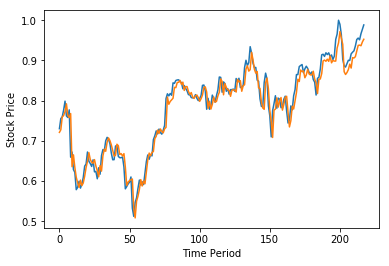

In [31]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={
                                X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    rmse_val = sess.run(rmse, feed_dict={
                    targets: testY, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

    # Plot predictions
    plt.plot(testY)
    plt.plot(test_predict)
    plt.xlabel("Time Period")
    plt.ylabel("Stock Price")
    plt.show()